In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [3]:
#Cleaning the LUCAS DF

In [4]:
df = pd.read_csv('LUCAS-SOIL-2018.csv')

In [5]:
df.columns

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N',
       'K', 'OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_0',
       'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'SURVEY_DATE',
       'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc'],
      dtype='object')

In [6]:
df.shape

(18984, 27)

In [7]:
df.dtypes

Depth                object
POINTID               int64
pH_CaCl2            float64
pH_H2O              float64
EC                  float64
OC                   object
CaCO3                object
P                    object
N                    object
K                    object
OC (20-30 cm)        object
CaCO3 (20-30 cm)    float64
Ox_Al               float64
Ox_Fe               float64
NUTS_0               object
NUTS_1               object
NUTS_2               object
NUTS_3               object
TH_LAT              float64
TH_LONG             float64
SURVEY_DATE          object
Elev                  int64
LC                   object
LU                   object
LC0_Desc             object
LC1_Desc             object
LU1_Desc             object
dtype: object

In [8]:
df.head()

,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3,< LOD,1.1,101.9,...,AT113,47.150238,16.134212,06-07-18,291,C23,U120,Woodland,Other coniferous woodland,Forestry
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1,< LOD,1.3,51.2,...,AT113,47.274272,16.175359,06-07-18,373,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1,12.3,3.1,114.8,...,AT113,47.123260,16.289693,02-06-18,246,C33,U120,Woodland,Other mixed woodland,Forestry
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3,< LOD,2,165.8,...,AT113,47.245693,16.357506,06-07-18,305,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2,< LOD,2.2,42.1,...,AT113,47.296372,16.416782,05-07-18,335,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry


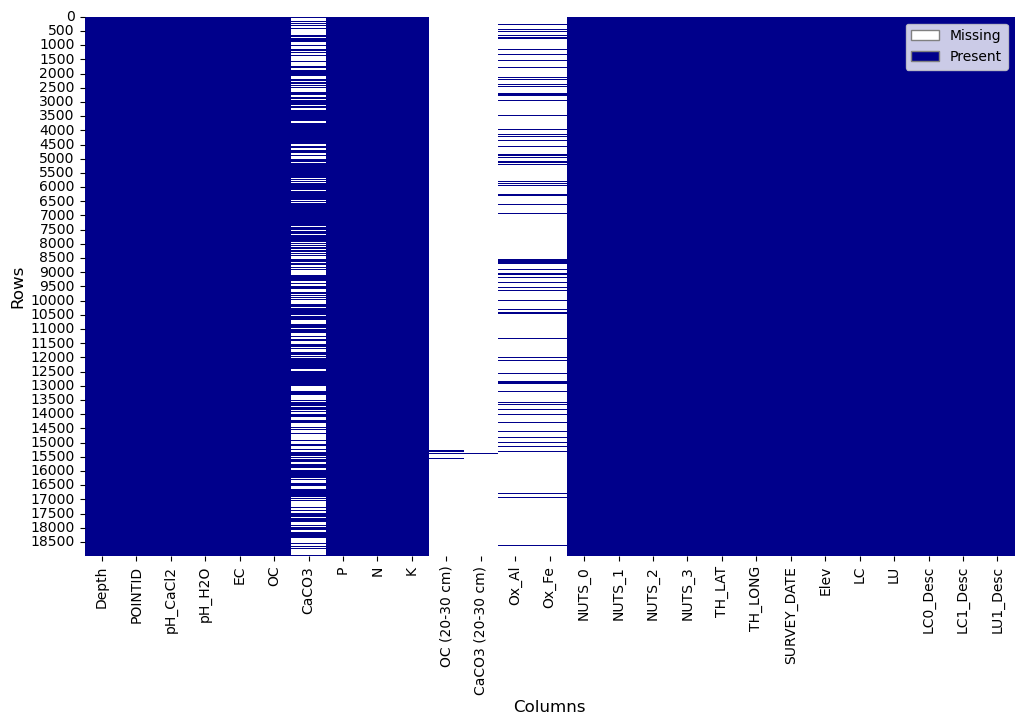

In [9]:

colors = ["darkblue", "white"]  
cmap = ListedColormap(colors)

plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(),
            cbar=False,  
            cmap=cmap,
            linewidths=0,
            linecolor='white')

plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)

missing_patch = mpatches.Patch(facecolor='white', edgecolor='gray', label='Missing')
present_patch = mpatches.Patch(facecolor='darkblue', edgecolor='gray', label='Present')

plt.legend(handles=[missing_patch, present_patch], loc='upper right', fontsize=10)
plt.savefig('missing_data_visualization.png', bbox_inches='tight')
plt.show()

In [10]:
for i in df.columns:
    print('Number of missing values in the '+i+' column:')
    print(df[i].isna().sum())

Number of missing values in the Depth column:
0
Number of missing values in the POINTID column:
0
Number of missing values in the pH_CaCl2 column:
1
Number of missing values in the pH_H2O column:
1
Number of missing values in the EC column:
9
Number of missing values in the OC column:
1
Number of missing values in the CaCO3 column:
7763
Number of missing values in the P column:
26
Number of missing values in the N column:
1
Number of missing values in the K column:
1
Number of missing values in the OC (20-30 cm) column:
18843
Number of missing values in the CaCO3 (20-30 cm) column:
18970
Number of missing values in the Ox_Al column:
16474
Number of missing values in the Ox_Fe column:
16474
Number of missing values in the NUTS_0 column:
0
Number of missing values in the NUTS_1 column:
0
Number of missing values in the NUTS_2 column:
0
Number of missing values in the NUTS_3 column:
0
Number of missing values in the TH_LAT column:
0
Number of missing values in the TH_LONG column:
0
Number

In [11]:
df.drop(columns=['OC (20-30 cm)', 'CaCO3 (20-30 cm)','Ox_Al','Ox_Fe','CaCO3','POINTID'], inplace=True)

In [12]:
for i in df.columns:
    print('The column '+i+' has the following unique values')
    print(df[i].unique())

The column Depth has the following unique values
['0-20 cm' '0-10 cm' '10-20 cm' '20-30 cm']
The column pH_CaCl2 has the following unique values
[4.1 5.5 6.1 6.3 5.8 7.1 7.4 7.2 7.6 5.2 3.9 6.4 5.4 6.8 5.7 4.9 3.5 3.3
 4.  4.2 6.9 6.  7.  4.7 7.3 4.3 6.7 6.2 5.9 5.  6.5 5.6 7.5 5.1 5.3 6.6
 4.8 4.5 3.6 4.6 4.4 3.8 3.7 3.1 3.2 3.4 3.  2.9 7.7 2.8 7.8 9.8 8.  7.9
 8.1 8.9 8.2 8.4 nan 2.6 2.7]
The column pH_H2O has the following unique values
[ 4.81  4.93  4.85  5.8   6.48  6.81  6.37  7.98  8.09  7.84  8.15  8.3
  7.52  5.82  4.74  6.8   5.84  6.93  6.11  5.57  6.39  6.24  4.05  3.78
  4.52  3.88  6.21  3.94  6.54  7.26  7.18  4.87  5.28  7.23  8.05  6.59
  7.37  4.9   5.33  6.06  5.76  4.48  7.01  6.32  6.34  4.72  6.89  6.12
  5.36  4.76  5.06  8.19  7.85  4.97  5.46  8.    6.31  7.1   7.42  4.79
  6.35  8.02  5.31  7.8   6.66  8.04  7.33  7.66  7.71  5.45  8.1   7.58
  8.24  8.06  5.08  5.77  8.28  7.77  7.55  7.87  7.36  7.81  6.97  4.82
  7.83  8.03  7.89  8.21  8.2   7.6   5.09  6.

In [13]:
df.replace('< LOD', 0, inplace=True)
df.replace('<0.0', 0, inplace=True)

In [14]:
df.dtypes

Depth           object
pH_CaCl2       float64
pH_H2O         float64
EC             float64
OC              object
P               object
N               object
K               object
NUTS_0          object
NUTS_1          object
NUTS_2          object
NUTS_3          object
TH_LAT         float64
TH_LONG        float64
SURVEY_DATE     object
Elev             int64
LC              object
LU              object
LC0_Desc        object
LC1_Desc        object
LU1_Desc        object
dtype: object

In [15]:
columns_to_cast = ['OC', 'P', 'N', 'K']

for col in columns_to_cast:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [16]:
columns_to_impute = ['pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'P', 'N', 'K']

for col in columns_to_impute:
    df[col] = df[col].fillna(df.groupby('NUTS_3')[col].transform('mean'))


In [17]:
#getting the target variables from the LC1_DESC column
crop_list = ['Triticale', 'Rape and turnip rape', 'Vineyards', 'Rye', 'Barley', 'Maize',
             'Common wheat', 'Potatoes', 'Durum wheat', 'Other root crops', 'Dry pulses',
             'Sugar beet', 'Sunflower', 'Soya', 'Other fruit trees and berries', 'Apple fruit',
             'Olive groves', 'Nuts trees', 'Pear fruit', 'Other Leguminous  and mixtures for fodder',
             'Other fibre and oleaginous crops', 'Other fresh vegetables', 'Oats', 'Lucerne',
             'Rice', 'Cherry fruit', 'Tobacco', 'Mix of cereals', 'Oranges', 'Tomatoes',
             'Other cereals', 'Clovers', 'Cotton', 'Strawberries']

def classify_crop(value):
    if value in crop_list:
        return value
    else:
        return "no crop"

df['target'] = df['LC1_Desc'].apply(classify_crop)

print(df[['LC1_Desc', 'target']])


                                   LC1_Desc   target
0                 Other coniferous woodland  no crop
1      Spruce dominated coniferous woodland  no crop
2                      Other mixed woodland  no crop
3        Pine dominated coniferous woodland  no crop
4        Pine dominated coniferous woodland  no crop
...                                     ...      ...
18979    Grassland without tree/shrub cover  no crop
18980                   Temporary grassland  no crop
18981    Grassland without tree/shrub cover  no crop
18982    Grassland without tree/shrub cover  no crop
18983    Grassland without tree/shrub cover  no crop

[18984 rows x 2 columns]


,Count,Proportion
target,,
no crop,11923,0.6281
Common wheat,1556,0.0820
Barley,977,0.0515
Maize,856,0.0451
Olive groves,462,0.0243
Rape and turnip rape,426,0.0224
Sunflower,335,0.0176
Vineyards,297,0.0156
Oats,239,0.0126


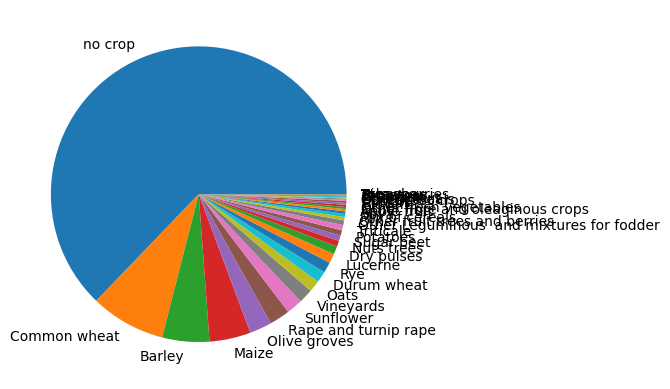

In [18]:
value_count = df['target'].value_counts()
ratio = value_count/len(df)

class_balance_df = pd.DataFrame({
    'Count': value_count,
    'Proportion':np.round(ratio,4)
})
display(class_balance_df)

plt.pie(class_balance_df['Proportion'], labels=class_balance_df.index)
plt.show()

In [19]:
df.drop(columns=['SURVEY_DATE','LC','LU','LC1_Desc'], inplace=True)

In [20]:
len(df)

18984

In [21]:
df.to_csv('cleaned_lucas_data.csv')

In [24]:
##Cleaning and joining the agro meteorological data

In [30]:
df_1 = pd.read_csv('weather_eu_1.csv',sep=';')

In [31]:
df_2 = pd.read_csv('weather_eu_2.csv',sep=';')

In [32]:
df = pd.concat([df_1,df_2])

In [33]:
df['DAY'] = pd.to_datetime(df['DAY'], format='%Y%m%d')

In [34]:
df.head()

,GRID_NO,LATITUDE,LONGITUDE,ALTITUDE,DAY,TEMPERATURE_MAX,TEMPERATURE_MIN,TEMPERATURE_AVG,WINDSPEED,PRECIPITATION,ET0
0,46062,37.48211,-3.35318,1043,2018-01-01,11.9,1.9,6.9,2.4,0.0,1.52
1,46062,37.48211,-3.35318,1043,2018-01-02,10.0,0.1,5.0,2.2,0.0,1.06
2,46062,37.48211,-3.35318,1043,2018-01-03,10.4,-0.1,5.1,1.3,0.0,0.75
3,46062,37.48211,-3.35318,1043,2018-01-04,10.8,2.6,6.7,1.7,0.0,0.77
4,46062,37.48211,-3.35318,1043,2018-01-05,11.1,5.4,8.3,2.3,2.2,1.19


In [54]:
len(df)

3131335

In [56]:
df.isna().sum()

GRID_NO            0
LATITUDE           0
LONGITUDE          0
ALTITUDE           0
DAY                0
TEMPERATURE_MAX    0
TEMPERATURE_MIN    0
TEMPERATURE_AVG    0
WINDSPEED          0
PRECIPITATION      0
ET0                0
dtype: int64

In [58]:
##mapping algo-meteorological data to NUTS3 regions

nuts3_gdf = gpd.read_file("NUTS_RG_20M_2016_4326.shp")

geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  

nuts3_gdf = nuts3_gdf.to_crs("EPSG:4326")

geo_df_with_nuts3 = gpd.sjoin(geo_df, nuts3_gdf, how="inner", predicate="within")

In [59]:
geo_df_with_nuts3.head()

,GRID_NO,LATITUDE,LONGITUDE,ALTITUDE,DAY,TEMPERATURE_MAX,TEMPERATURE_MIN,TEMPERATURE_AVG,WINDSPEED,PRECIPITATION,...,geometry,index_right,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE
0,46062,37.48211,-3.35318,1043,2018-01-01,11.9,1.9,6.9,2.4,0.0,...,POINT (-3.35318 37.48211),0,ES,0,ES,ESPAÑA,ESPAÑA,0,0,0
0,46062,37.48211,-3.35318,1043,2018-01-01,11.9,1.9,6.9,2.4,0.0,...,POINT (-3.35318 37.48211),140,ES6,1,ES,SUR,SUR,0,0,0
0,46062,37.48211,-3.35318,1043,2018-01-01,11.9,1.9,6.9,2.4,0.0,...,POINT (-3.35318 37.48211),366,ES61,2,ES,Andalucía,Andalucía,0,0,0
0,46062,37.48211,-3.35318,1043,2018-01-01,11.9,1.9,6.9,2.4,0.0,...,POINT (-3.35318 37.48211),1307,ES614,3,ES,Granada,Granada,3,2,1
1,46062,37.48211,-3.35318,1043,2018-01-02,10.0,0.1,5.0,2.2,0.0,...,POINT (-3.35318 37.48211),0,ES,0,ES,ESPAÑA,ESPAÑA,0,0,0


In [60]:
filtered_df = geo_df_with_nuts3[geo_df_with_nuts3['LEVL_CODE'] == 3]

In [61]:
filtered_df['MONTH'] = filtered_df['DAY'].dt.to_period('M')

/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [62]:
filtered_df.drop(columns=['geometry','index_right'],inplace=True)

/var/folders/v6/m8bc43ln77365fv_xpkw2y7m0000gq/T/ipykernel_1079/2950050334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['geometry','index_right'],inplace=True)


In [63]:
numeric_columns = [
    'GRID_NO', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'TEMPERATURE_MAX', 
    'TEMPERATURE_MIN', 'TEMPERATURE_AVG', 'PRECIPITATION', 
    'ET0', 'LEVL_CODE', 'MOUNT_TYPE', 
    'URBN_TYPE', 'COAST_TYPE','NUTS_ID','MONTH','WINDSPEED'
]

In [64]:
monthly_aggregated_num_df = (
    filtered_df[numeric_columns]
    .groupby(['NUTS_ID', 'MONTH'])
    .agg({
            'TEMPERATURE_MAX': 'max',  
            'TEMPERATURE_MIN': 'min',  
            'TEMPERATURE_AVG': 'mean',  
            'GRID_NO': 'mean', 
            'LATITUDE': 'mean',
            'LONGITUDE': 'mean',
            'ALTITUDE': 'mean',
            'PRECIPITATION': 'mean',
            'ET0': 'mean',
            'WINDSPEED': 'mean',
            'LEVL_CODE': 'mean',
            'MOUNT_TYPE': 'mean',
            'URBN_TYPE': 'mean',
            'COAST_TYPE': 'mean'
        })
        .reset_index()
)

In [65]:
monthly_aggregated_num_df.isna().sum()

NUTS_ID            0
MONTH              0
TEMPERATURE_MAX    0
TEMPERATURE_MIN    0
TEMPERATURE_AVG    0
GRID_NO            0
LATITUDE           0
LONGITUDE          0
ALTITUDE           0
PRECIPITATION      0
ET0                0
WINDSPEED          0
LEVL_CODE          0
MOUNT_TYPE         0
URBN_TYPE          0
COAST_TYPE         0
dtype: int64

In [66]:
len(monthly_aggregated_num_df)

13788

In [67]:
missing_combinations = monthly_aggregated_num_df.groupby(['NUTS_ID', 'MONTH']).size().unstack(fill_value=0)
print("Missing NUTS_ID/MONTH combinations:")
print(missing_combinations[(missing_combinations == 0).any(axis=1)])


Missing NUTS_ID/MONTH combinations:
Empty DataFrame
Columns: [2018-01, 2018-02, 2018-03, 2018-04, 2018-05, 2018-06, 2018-07, 2018-08, 2018-09, 2018-10, 2018-11, 2018-12]
Index: []


In [68]:
monthly_aggregated_num_df

,NUTS_ID,MONTH,TEMPERATURE_MAX,TEMPERATURE_MIN,TEMPERATURE_AVG,GRID_NO,LATITUDE,LONGITUDE,ALTITUDE,PRECIPITATION,ET0,WINDSPEED,LEVL_CODE,MOUNT_TYPE,URBN_TYPE,COAST_TYPE
0,AL013,2018-01,9.6,-8.7,-0.448387,66142.000000,42.457990,19.926530,1503.000000,3.087097,0.621613,1.519355,3.0,4.0,3.0,1.0
1,AL013,2018-02,6.8,-13.4,-2.135714,66142.000000,42.457990,19.926530,1503.000000,9.232143,0.755000,2.078571,3.0,4.0,3.0,1.0
2,AL013,2018-03,12.0,-14.5,1.641935,66142.000000,42.457990,19.926530,1503.000000,10.190323,1.394516,2.400000,3.0,4.0,3.0,1.0
3,AL013,2018-04,20.9,-2.0,9.916667,66142.000000,42.457990,19.926530,1503.000000,0.350000,3.319667,2.063333,3.0,4.0,3.0,1.0
4,AL013,2018-05,21.8,2.9,12.077419,66142.000000,42.457990,19.926530,1503.000000,1.970968,3.487419,1.683871,3.0,4.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13783,UKN16,2018-08,21.7,3.6,14.550230,122778.142857,54.439127,-7.724886,74.714286,2.921659,2.095530,3.717051,3.0,4.0,3.0,2.0
13784,UKN16,2018-09,19.7,0.8,11.775238,122778.142857,54.439127,-7.724886,74.714286,2.251429,1.581381,4.143333,3.0,4.0,3.0,2.0
13785,UKN16,2018-10,20.9,-1.8,9.860369,122778.142857,54.439127,-7.724886,74.714286,2.136406,1.029078,4.473733,3.0,4.0,3.0,2.0
13786,UKN16,2018-11,15.4,-3.2,7.532857,122778.142857,54.439127,-7.724886,74.714286,3.247143,0.582286,5.140952,3.0,4.0,3.0,2.0


In [69]:
pivoted_df = monthly_aggregated_num_df.pivot(index='NUTS_ID', columns='MONTH')
    
# flatten multiindex columns
pivoted_df.columns = [f"{col[0]}_{col[1]}" for col in pivoted_df.columns]

In [70]:
pivoted_df.isna().sum()

TEMPERATURE_MAX_2018-01    0
TEMPERATURE_MAX_2018-02    0
TEMPERATURE_MAX_2018-03    0
TEMPERATURE_MAX_2018-04    0
TEMPERATURE_MAX_2018-05    0
                          ..
COAST_TYPE_2018-08         0
COAST_TYPE_2018-09         0
COAST_TYPE_2018-10         0
COAST_TYPE_2018-11         0
COAST_TYPE_2018-12         0
Length: 168, dtype: int64

In [242]:
len(pivoted_df)

1149

In [243]:
prefixes_to_drop = [
    "GRID_NO", "LATITUDE", "LONGITUDE", "ALTITUDE", "LEVL_CODE", "MOUNT_TYPE", "URBN_TYPE", "COAST_TYPE"
]

columns_to_drop = [f"{prefix}_2018-{str(month).zfill(2)}" for prefix in prefixes_to_drop for month in range(2, 13)]

In [244]:
pivoted_df.drop(columns = columns_to_drop, inplace=True)

In [245]:
pivoted_df.isna()

,TEMPERATURE_MAX_2018-01,TEMPERATURE_MAX_2018-02,TEMPERATURE_MAX_2018-03,TEMPERATURE_MAX_2018-04,TEMPERATURE_MAX_2018-05,TEMPERATURE_MAX_2018-06,TEMPERATURE_MAX_2018-07,TEMPERATURE_MAX_2018-08,TEMPERATURE_MAX_2018-09,TEMPERATURE_MAX_2018-10,...,WINDSPEED_2018-07,WINDSPEED_2018-08,WINDSPEED_2018-09,WINDSPEED_2018-10,WINDSPEED_2018-11,WINDSPEED_2018-12,LEVL_CODE_2018-01,MOUNT_TYPE_2018-01,URBN_TYPE_2018-01,COAST_TYPE_2018-01
NUTS_ID,,,,,,,,,,,,,,,,,,,,,
AL013,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AL014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AL015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT111,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT112,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKN12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
UKN13,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
UKN14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


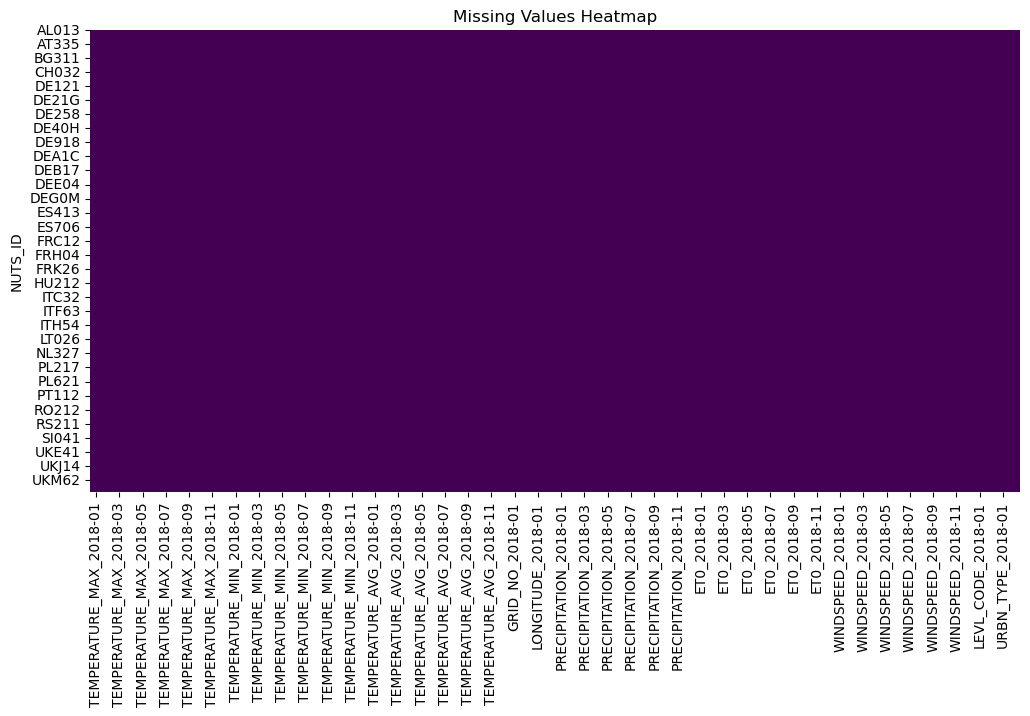

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(pivoted_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [247]:
len(pivoted_df)

1149

In [248]:
df_suplement = pd.read_csv('weather_combined.csv')
df_suplement.set_index('NUTS_ID',inplace=True)
df_suplement.drop(columns=['Unnamed: 0'],inplace=True)

In [249]:
supllist = ['TEMPERATURE_MAX_2018-01', 'TEMPERATURE_MAX_2018-02',
       'TEMPERATURE_MAX_2018-03', 'TEMPERATURE_MAX_2018-04',
       'TEMPERATURE_MAX_2018-05', 'TEMPERATURE_MAX_2018-06',
       'TEMPERATURE_MAX_2018-07', 'TEMPERATURE_MAX_2018-08',
       'TEMPERATURE_MAX_2018-09', 'TEMPERATURE_MAX_2018-10',
       'TEMPERATURE_MAX_2018-11', 'TEMPERATURE_MAX_2018-12',
       'TEMPERATURE_MIN_2018-01', 'TEMPERATURE_MIN_2018-02',
       'TEMPERATURE_MIN_2018-03', 'TEMPERATURE_MIN_2018-04',
       'TEMPERATURE_MIN_2018-05', 'TEMPERATURE_MIN_2018-06',
       'TEMPERATURE_MIN_2018-07', 'TEMPERATURE_MIN_2018-08',
       'TEMPERATURE_MIN_2018-09', 'TEMPERATURE_MIN_2018-10',
       'TEMPERATURE_MIN_2018-11', 'TEMPERATURE_MIN_2018-12',
       'TEMPERATURE_AVG_2018-01', 'TEMPERATURE_AVG_2018-02',
       'TEMPERATURE_AVG_2018-03', 'TEMPERATURE_AVG_2018-04',
       'TEMPERATURE_AVG_2018-05', 'TEMPERATURE_AVG_2018-06',
       'TEMPERATURE_AVG_2018-07', 'TEMPERATURE_AVG_2018-08',
       'TEMPERATURE_AVG_2018-09', 'TEMPERATURE_AVG_2018-10',
       'TEMPERATURE_AVG_2018-11', 'TEMPERATURE_AVG_2018-12', 
       'PRECIPITATION_2018-01', 'PRECIPITATION_2018-02',
       'PRECIPITATION_2018-03', 'PRECIPITATION_2018-04',
       'PRECIPITATION_2018-05', 'PRECIPITATION_2018-06',
       'PRECIPITATION_2018-07', 'PRECIPITATION_2018-08',
       'PRECIPITATION_2018-09', 'PRECIPITATION_2018-10',
       'PRECIPITATION_2018-11', 'PRECIPITATION_2018-12']

In [250]:
df_suplement_filtered = df_suplement[supllist]

In [251]:
df_suplement_filtered.head()

,TEMPERATURE_MAX_2018-01,TEMPERATURE_MAX_2018-02,TEMPERATURE_MAX_2018-03,TEMPERATURE_MAX_2018-04,TEMPERATURE_MAX_2018-05,TEMPERATURE_MAX_2018-06,TEMPERATURE_MAX_2018-07,TEMPERATURE_MAX_2018-08,TEMPERATURE_MAX_2018-09,TEMPERATURE_MAX_2018-10,...,PRECIPITATION_2018-03,PRECIPITATION_2018-04,PRECIPITATION_2018-05,PRECIPITATION_2018-06,PRECIPITATION_2018-07,PRECIPITATION_2018-08,PRECIPITATION_2018-09,PRECIPITATION_2018-10,PRECIPITATION_2018-11,PRECIPITATION_2018-12
NUTS_ID,,,,,,,,,,,,,,,,,,,,,
AT111,17.2,9.9,17.5,28.2,28.7,31.6,33.3,33.4,29.8,23.5,...,1.687097,0.603333,1.619355,3.836667,0.983871,2.925806,2.786667,0.909677,1.880000,1.448387
AT112,16.7,8.3,18.1,28.9,30.0,32.2,33.7,35.2,30.0,24.0,...,1.893548,0.946667,2.706452,3.806667,1.796774,1.258065,3.723333,0.548387,1.643333,1.725806
AT113,16.5,11.4,16.8,28.2,28.7,31.2,33.0,33.1,29.7,23.4,...,1.879032,0.726667,4.054839,4.741667,2.048387,2.551613,2.093333,0.808065,1.493333,0.230645
AT121,14.0,8.9,16.9,28.8,31.4,32.5,33.6,36.5,30.8,25.0,...,1.369032,0.667333,2.481290,4.664667,1.563226,1.910323,2.704000,1.676129,1.481333,3.985806
AT122,18.6,8.8,18.4,28.9,29.2,31.4,32.2,34.9,30.2,23.6,...,2.148387,1.074444,4.138710,5.057222,3.009140,3.779032,2.455000,2.270968,1.678889,3.995699


In [252]:
print("Columns in combined_df:")
print(pivoted_df.columns)

print("\nColumns in temperature_df:")
print(df_suplement_filtered.columns)

merged_df = pivoted_df.merge(
    df_suplement_filtered, 
    left_index=True,  
    right_index=True,  
    how='left',  
    suffixes=('', '_supplement') )

columns_to_fill = [
    'TEMPERATURE_MAX', 'TEMPERATURE_MIN', 'TEMPERATURE_AVG', 'PRECIPITATION'
]

for column in columns_to_fill:
    for month in range(1, 13):
        col_name = f"{column}_2018-{month:02}"
        supplement_col_name = f"{col_name}_supplement"
        
        if col_name in merged_df.columns and supplement_col_name in merged_df.columns:
            merged_df[col_name] = merged_df[col_name].fillna(merged_df[supplement_col_name])

supplement_columns = [f"{col}" for col in merged_df.columns if col.endswith('_supplement')]
merged_df = merged_df.drop(columns=supplement_columns)

print(merged_df)

Columns in combined_df:
Index(['TEMPERATURE_MAX_2018-01', 'TEMPERATURE_MAX_2018-02',
       'TEMPERATURE_MAX_2018-03', 'TEMPERATURE_MAX_2018-04',
       'TEMPERATURE_MAX_2018-05', 'TEMPERATURE_MAX_2018-06',
       'TEMPERATURE_MAX_2018-07', 'TEMPERATURE_MAX_2018-08',
       'TEMPERATURE_MAX_2018-09', 'TEMPERATURE_MAX_2018-10',
       'TEMPERATURE_MAX_2018-11', 'TEMPERATURE_MAX_2018-12',
       'TEMPERATURE_MIN_2018-01', 'TEMPERATURE_MIN_2018-02',
       'TEMPERATURE_MIN_2018-03', 'TEMPERATURE_MIN_2018-04',
       'TEMPERATURE_MIN_2018-05', 'TEMPERATURE_MIN_2018-06',
       'TEMPERATURE_MIN_2018-07', 'TEMPERATURE_MIN_2018-08',
       'TEMPERATURE_MIN_2018-09', 'TEMPERATURE_MIN_2018-10',
       'TEMPERATURE_MIN_2018-11', 'TEMPERATURE_MIN_2018-12',
       'TEMPERATURE_AVG_2018-01', 'TEMPERATURE_AVG_2018-02',
       'TEMPERATURE_AVG_2018-03', 'TEMPERATURE_AVG_2018-04',
       'TEMPERATURE_AVG_2018-05', 'TEMPERATURE_AVG_2018-06',
       'TEMPERATURE_AVG_2018-07', 'TEMPERATURE_AVG_2018-08',


In [253]:
merged_df = merged_df.reset_index()

merged_df['COUNTRY'] = merged_df['NUTS_ID'].str[:2]

merged_df = merged_df.set_index('NUTS_ID')

country_means = merged_df.groupby('COUNTRY').transform('mean')

merged_df = merged_df.fillna(country_means)

merged_df = merged_df.drop(columns='COUNTRY')

print(merged_df)


         TEMPERATURE_MAX_2018-01  TEMPERATURE_MAX_2018-02  \
NUTS_ID                                                     
AL013                        9.6                      6.8   
AL014                       16.8                     16.7   
AL015                       14.8                     14.4   
AT111                       17.3                      9.5   
AT112                       16.5                      8.8   
...                          ...                      ...   
UKN12                       12.3                     11.8   
UKN13                       11.4                     12.2   
UKN14                       12.2                     12.8   
UKN15                       12.1                     12.7   
UKN16                       13.5                     12.9   

         TEMPERATURE_MAX_2018-03  TEMPERATURE_MAX_2018-04  \
NUTS_ID                                                     
AL013                       12.0                     20.9   
AL014                  

In [254]:
merged_df.to_csv('final_weather.csv')

In [255]:
##Merging Datasets

In [256]:
weather_df = pd.read_csv('final_weather.csv')

In [257]:
len(weather_df)

1291

In [258]:
soil_df = pd.read_csv('cleaned_lucas_data.csv')

In [259]:
len(soil_df)

18984

In [260]:
weather_df.rename(columns = {'NUTS_ID':'NUTS_3'}, inplace=True)

In [261]:
soil_slim_df = soil_df[soil_df['NUTS_3'].isin(weather_df['NUTS_3'].unique())]

In [262]:
soil_slim_df.NUTS_3.nunique()

947

In [263]:
weather_df.NUTS_3.nunique()

1149

In [299]:
merged_df = soil_slim_df.merge(weather_df, on='NUTS_3', how='left')

In [301]:
soil_df.isna().sum()

Unnamed: 0    0
Depth         0
pH_CaCl2      0
pH_H2O        0
EC            0
OC            0
P             0
N             0
K             0
NUTS_0        0
NUTS_1        0
NUTS_2        0
NUTS_3        0
TH_LAT        0
TH_LONG       0
Elev          0
LC0_Desc      0
LU1_Desc      0
target        0
dtype: int64

In [303]:
merged_df.fillna(0,inplace=True)

In [305]:
merged_df

,Unnamed: 0,Depth,pH_CaCl2,pH_H2O,EC,OC,P,N,K,NUTS_0,...,WINDSPEED_2018-07,WINDSPEED_2018-08,WINDSPEED_2018-09,WINDSPEED_2018-10,WINDSPEED_2018-11,WINDSPEED_2018-12,LEVL_CODE_2018-01,MOUNT_TYPE_2018-01,URBN_TYPE_2018-01,COAST_TYPE_2018-01
0,0,0-20 cm,4.1,4.81,8.73,12.4,0.0,1.1,101.9,AT,...,1.683871,1.454839,1.440000,1.453226,1.586667,1.611290,3.0,4.0,3.0,3.0
1,1,0-20 cm,4.1,4.93,5.06,16.7,0.0,1.3,51.2,AT,...,1.683871,1.454839,1.440000,1.453226,1.586667,1.611290,3.0,4.0,3.0,3.0
2,2,0-20 cm,4.1,4.85,12.53,47.5,12.3,3.1,114.8,AT,...,1.683871,1.454839,1.440000,1.453226,1.586667,1.611290,3.0,4.0,3.0,3.0
3,3,0-20 cm,5.5,5.80,21.10,28.1,0.0,2.0,165.8,AT,...,1.683871,1.454839,1.440000,1.453226,1.586667,1.611290,3.0,4.0,3.0,3.0
4,4,0-20 cm,6.1,6.48,10.89,19.4,0.0,2.2,42.1,AT,...,1.683871,1.454839,1.440000,1.453226,1.586667,1.611290,3.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20523,18979,0-20 cm,6.0,6.13,91.40,51.4,92.2,5.3,1036.9,UK,...,2.839631,3.053917,3.494762,3.726728,4.694762,4.261751,3.0,4.0,3.0,2.0
20524,18980,0-20 cm,4.9,5.14,51.78,73.9,81.6,6.9,225.0,UK,...,3.630108,4.584946,5.865556,5.910753,6.591111,5.993548,3.0,4.0,3.0,1.0
20525,18981,0-20 cm,5.5,5.94,22.40,63.7,101.9,6.7,569.5,UK,...,2.554839,2.851613,3.353333,3.335484,4.910000,4.009677,3.0,4.0,1.0,2.0
20526,18982,0-20 cm,5.3,5.90,10.42,38.3,7.3,3.1,1907.9,UK,...,3.019355,3.541935,4.073333,4.041935,5.333333,4.651613,3.0,4.0,2.0,1.0


In [307]:
df=merged_df

In [309]:
df.drop(columns=[ 'Unnamed: 0'],inplace=True)

In [311]:
df

,Depth,pH_CaCl2,pH_H2O,EC,OC,P,N,K,NUTS_0,NUTS_1,...,WINDSPEED_2018-07,WINDSPEED_2018-08,WINDSPEED_2018-09,WINDSPEED_2018-10,WINDSPEED_2018-11,WINDSPEED_2018-12,LEVL_CODE_2018-01,MOUNT_TYPE_2018-01,URBN_TYPE_2018-01,COAST_TYPE_2018-01
0,0-20 cm,4.1,4.81,8.73,12.4,0.0,1.1,101.9,AT,AT1,...,1.683871,1.454839,1.440000,1.453226,1.586667,1.611290,3.0,4.0,3.0,3.0
1,0-20 cm,4.1,4.93,5.06,16.7,0.0,1.3,51.2,AT,AT1,...,1.683871,1.454839,1.440000,1.453226,1.586667,1.611290,3.0,4.0,3.0,3.0
2,0-20 cm,4.1,4.85,12.53,47.5,12.3,3.1,114.8,AT,AT1,...,1.683871,1.454839,1.440000,1.453226,1.586667,1.611290,3.0,4.0,3.0,3.0
3,0-20 cm,5.5,5.80,21.10,28.1,0.0,2.0,165.8,AT,AT1,...,1.683871,1.454839,1.440000,1.453226,1.586667,1.611290,3.0,4.0,3.0,3.0
4,0-20 cm,6.1,6.48,10.89,19.4,0.0,2.2,42.1,AT,AT1,...,1.683871,1.454839,1.440000,1.453226,1.586667,1.611290,3.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20523,0-20 cm,6.0,6.13,91.40,51.4,92.2,5.3,1036.9,UK,UKN,...,2.839631,3.053917,3.494762,3.726728,4.694762,4.261751,3.0,4.0,3.0,2.0
20524,0-20 cm,4.9,5.14,51.78,73.9,81.6,6.9,225.0,UK,UKN,...,3.630108,4.584946,5.865556,5.910753,6.591111,5.993548,3.0,4.0,3.0,1.0
20525,0-20 cm,5.5,5.94,22.40,63.7,101.9,6.7,569.5,UK,UKN,...,2.554839,2.851613,3.353333,3.335484,4.910000,4.009677,3.0,4.0,1.0,2.0
20526,0-20 cm,5.3,5.90,10.42,38.3,7.3,3.1,1907.9,UK,UKN,...,3.019355,3.541935,4.073333,4.041935,5.333333,4.651613,3.0,4.0,2.0,1.0


In [313]:
##Joining the biogeographical regions

In [315]:
biogeo_regions = gpd.read_file("eea_v_3035_1_mio_biogeo-regions_p_2016_v01_r00/BiogeoRegions2016.shp")

print(biogeo_regions.head())
print(biogeo_regions.columns) 
print(biogeo_regions.crs)  

   PK_UID short_name pre_2012       code                               name  \
0       1     alpine      ALP     Alpine     Alpine Bio-geographical Region   
1       2  anatolian      ANA  Anatolian  Anatolian Bio-geographical Region   
2       3     arctic      ARC     Arctic     Arctic Bio-geographical Region   
3       4   atlantic      ATL   Atlantic   Atlantic Bio-geographical Region   
4       5   blackSea      BLS   BlackSea  Black Sea Bio-geographical Region   

                                            geometry  
0  MULTIPOLYGON (((4648847 2125736, 4650323 21253...  
1  POLYGON ((7102177 2636895, 7108521 2634097, 71...  
2  MULTIPOLYGON (((3184414 4809376, 3183674 48085...  
3  MULTIPOLYGON (((3102547 3350580, 3102548 33505...  
4  MULTIPOLYGON (((6113066 2293965, 6112851 22941...  
Index(['PK_UID', 'short_name', 'pre_2012', 'code', 'name', 'geometry'], dtype='object')
PROJCS["ETRS_1989_LAEA_L52_M10",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID

In [316]:

df['geometry'] = df.apply(lambda row: Point(row['TH_LONG'], row['TH_LAT']), axis=1)

# Create a GeoDataFrame with the correct CRS
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Verify
print(gdf.head())


     Depth  pH_CaCl2  pH_H2O     EC    OC     P    N      K NUTS_0 NUTS_1  \
0  0-20 cm       4.1    4.81   8.73  12.4   0.0  1.1  101.9     AT    AT1   
1  0-20 cm       4.1    4.93   5.06  16.7   0.0  1.3   51.2     AT    AT1   
2  0-20 cm       4.1    4.85  12.53  47.5  12.3  3.1  114.8     AT    AT1   
3  0-20 cm       5.5    5.80  21.10  28.1   0.0  2.0  165.8     AT    AT1   
4  0-20 cm       6.1    6.48  10.89  19.4   0.0  2.2   42.1     AT    AT1   

   ... WINDSPEED_2018-08 WINDSPEED_2018-09  WINDSPEED_2018-10  \
0  ...          1.454839              1.44           1.453226   
1  ...          1.454839              1.44           1.453226   
2  ...          1.454839              1.44           1.453226   
3  ...          1.454839              1.44           1.453226   
4  ...          1.454839              1.44           1.453226   

   WINDSPEED_2018-11  WINDSPEED_2018-12 LEVL_CODE_2018-01 MOUNT_TYPE_2018-01  \
0           1.586667            1.61129               3.0         

In [317]:
len(gdf)

20528

In [318]:
gdf = gdf.to_crs(biogeo_regions.crs)


In [320]:
gdf = gpd.sjoin(gdf, biogeo_regions, how="left", predicate="within")

In [324]:
print(biogeo_regions.is_valid.sum(), "out of", len(biogeo_regions))


12 out of 12


In [326]:
gdf.isna().sum()

Depth         0
pH_CaCl2      0
pH_H2O        0
EC            0
OC            0
             ..
PK_UID        3
short_name    3
pre_2012      3
code          3
name          3
Length: 105, dtype: int64

In [327]:
gdf.drop(columns=['geometry','index_right','PK_UID','short_name','pre_2012','name'],inplace=True)
print(gdf.head())

     Depth  pH_CaCl2  pH_H2O     EC    OC     P    N      K NUTS_0 NUTS_1  \
0  0-20 cm       4.1    4.81   8.73  12.4   0.0  1.1  101.9     AT    AT1   
1  0-20 cm       4.1    4.93   5.06  16.7   0.0  1.3   51.2     AT    AT1   
2  0-20 cm       4.1    4.85  12.53  47.5  12.3  3.1  114.8     AT    AT1   
3  0-20 cm       5.5    5.80  21.10  28.1   0.0  2.0  165.8     AT    AT1   
4  0-20 cm       6.1    6.48  10.89  19.4   0.0  2.2   42.1     AT    AT1   

   ... WINDSPEED_2018-08 WINDSPEED_2018-09  WINDSPEED_2018-10  \
0  ...          1.454839              1.44           1.453226   
1  ...          1.454839              1.44           1.453226   
2  ...          1.454839              1.44           1.453226   
3  ...          1.454839              1.44           1.453226   
4  ...          1.454839              1.44           1.453226   

   WINDSPEED_2018-11  WINDSPEED_2018-12 LEVL_CODE_2018-01 MOUNT_TYPE_2018-01  \
0           1.586667            1.61129               3.0         

In [328]:
gdf.dropna(inplace=True)

In [329]:
#At a later stage I aggregated weather variables from monthly to seasonal level, I include it here, before starting the modeling

In [330]:
winter_max = ['TEMPERATURE_MAX_2018-12', 'TEMPERATURE_MAX_2018-01', 'TEMPERATURE_MAX_2018-02']
spring_max = ['TEMPERATURE_MAX_2018-03', 'TEMPERATURE_MAX_2018-04', 'TEMPERATURE_MAX_2018-05']
summer_max = ['TEMPERATURE_MAX_2018-06', 'TEMPERATURE_MAX_2018-07', 'TEMPERATURE_MAX_2018-08']
fall_max = ['TEMPERATURE_MAX_2018-09', 'TEMPERATURE_MAX_2018-10', 'TEMPERATURE_MAX_2018-11']

gdf['TEMP_MAX_WINTER'] = gdf[winter_max].max(axis=1)
gdf['TEMP_MAX_SPRING'] = gdf[spring_max].max(axis=1)
gdf['TEMP_MAX_SUMMER'] = gdf[summer_max].max(axis=1)
gdf['TEMP_MAX_FALL'] = gdf[fall_max].max(axis=1)

winter_min = ['TEMPERATURE_MIN_2018-12', 'TEMPERATURE_MIN_2018-01', 'TEMPERATURE_MIN_2018-02']
spring_min = ['TEMPERATURE_MIN_2018-03', 'TEMPERATURE_MIN_2018-04', 'TEMPERATURE_MIN_2018-05']
summer_min = ['TEMPERATURE_MIN_2018-06', 'TEMPERATURE_MIN_2018-07', 'TEMPERATURE_MIN_2018-08']
fall_min = ['TEMPERATURE_MIN_2018-09', 'TEMPERATURE_MIN_2018-10', 'TEMPERATURE_MIN_2018-11']

gdf['TEMP_MIN_WINTER'] = gdf[winter_min].min(axis=1)
gdf['TEMP_MIN_SPRING'] = gdf[spring_min].min(axis=1)
gdf['TEMP_MIN_SUMMER'] = gdf[summer_min].min(axis=1)
gdf['TEMP_MIN_FALL'] = gdf[fall_min].min(axis=1)

winter_avg = ['TEMPERATURE_AVG_2018-12', 'TEMPERATURE_AVG_2018-01', 'TEMPERATURE_AVG_2018-02']
spring_avg = ['TEMPERATURE_AVG_2018-03', 'TEMPERATURE_AVG_2018-04', 'TEMPERATURE_AVG_2018-05']
summer_avg = ['TEMPERATURE_AVG_2018-06', 'TEMPERATURE_AVG_2018-07', 'TEMPERATURE_AVG_2018-08']
fall_avg = ['TEMPERATURE_AVG_2018-09', 'TEMPERATURE_AVG_2018-10', 'TEMPERATURE_AVG_2018-11']

gdf['TEMP_AVG_WINTER'] = gdf[winter_avg].mean(axis=1)
gdf['TEMP_AVG_SPRING'] = gdf[spring_avg].mean(axis=1)
gdf['TEMP_AVG_SUMMER'] = gdf[summer_avg].mean(axis=1)
gdf['TEMP_AVG_FALL'] = gdf[fall_avg].mean(axis=1)

gdf.drop(columns=winter_max + spring_max + summer_max + fall_max + winter_min + spring_min + summer_min + fall_min + winter_avg + spring_avg + summer_avg + fall_avg, inplace=True)

print(gdf.head())


     Depth  pH_CaCl2  pH_H2O     EC    OC     P    N      K NUTS_0 NUTS_1  \
0  0-20 cm       4.1    4.81   8.73  12.4   0.0  1.1  101.9     AT    AT1   
1  0-20 cm       4.1    4.93   5.06  16.7   0.0  1.3   51.2     AT    AT1   
2  0-20 cm       4.1    4.85  12.53  47.5  12.3  3.1  114.8     AT    AT1   
3  0-20 cm       5.5    5.80  21.10  28.1   0.0  2.0  165.8     AT    AT1   
4  0-20 cm       6.1    6.48  10.89  19.4   0.0  2.2   42.1     AT    AT1   

   ... TEMP_MAX_SUMMER TEMP_MAX_FALL  TEMP_MIN_WINTER  TEMP_MIN_SPRING  \
0  ...            33.1          29.8            -14.4            -16.8   
1  ...            33.1          29.8            -14.4            -16.8   
2  ...            33.1          29.8            -14.4            -16.8   
3  ...            33.1          29.8            -14.4            -16.8   
4  ...            33.1          29.8            -14.4            -16.8   

   TEMP_MIN_SUMMER TEMP_MIN_FALL TEMP_AVG_WINTER TEMP_AVG_SPRING  \
0              7.1      

In [336]:
winter_precip = ['PRECIPITATION_2018-12', 'PRECIPITATION_2018-01', 'PRECIPITATION_2018-02']
spring_precip = ['PRECIPITATION_2018-03', 'PRECIPITATION_2018-04', 'PRECIPITATION_2018-05']
summer_precip = ['PRECIPITATION_2018-06', 'PRECIPITATION_2018-07', 'PRECIPITATION_2018-08']
fall_precip = ['PRECIPITATION_2018-09', 'PRECIPITATION_2018-10', 'PRECIPITATION_2018-11']

gdf['PRECIP_WINTER'] = gdf[winter_precip].mean(axis=1)
gdf['PRECIP_SPRING'] = gdf[spring_precip].mean(axis=1)
gdf['PRECIP_SUMMER'] = gdf[summer_precip].mean(axis=1)
gdf['PRECIP_FALL'] = gdf[fall_precip].mean(axis=1)

winter_eto = ['ET0_2018-12', 'ET0_2018-01', 'ET0_2018-02']
spring_eto = ['ET0_2018-03', 'ET0_2018-04', 'ET0_2018-05']
summer_eto = ['ET0_2018-06', 'ET0_2018-07', 'ET0_2018-08']
fall_eto = ['ET0_2018-09', 'ET0_2018-10', 'ET0_2018-11']

gdf['ETO_WINTER'] = gdf[winter_eto].mean(axis=1)
gdf['ETO_SPRING'] = gdf[spring_eto].mean(axis=1)
gdf['ETO_SUMMER'] = gdf[summer_eto].mean(axis=1)
gdf['ETO_FALL'] = gdf[fall_eto].mean(axis=1)

winter_wind = ['WINDSPEED_2018-12', 'WINDSPEED_2018-01', 'WINDSPEED_2018-02']
spring_wind = ['WINDSPEED_2018-03', 'WINDSPEED_2018-04', 'WINDSPEED_2018-05']
summer_wind = ['WINDSPEED_2018-06', 'WINDSPEED_2018-07', 'WINDSPEED_2018-08']
fall_wind = ['WINDSPEED_2018-09', 'WINDSPEED_2018-10', 'WINDSPEED_2018-11']

gdf['WIND_WINTER'] = gdf[winter_wind].mean(axis=1)
gdf['WIND_SPRING'] = gdf[spring_wind].mean(axis=1)
gdf['WIND_SUMMER'] = gdf[summer_wind].mean(axis=1)
gdf['WIND_FALL'] = gdf[fall_wind].mean(axis=1)

gdf.drop(columns=winter_precip + spring_precip + summer_precip + fall_precip +
         winter_eto + spring_eto + summer_eto + fall_eto +
         winter_wind + spring_wind + summer_wind + fall_wind, inplace=True)

print(gdf.head())


     Depth  pH_CaCl2  pH_H2O     EC    OC     P    N      K NUTS_0 NUTS_1  \
0  0-20 cm       4.1    4.81   8.73  12.4   0.0  1.1  101.9     AT    AT1   
1  0-20 cm       4.1    4.93   5.06  16.7   0.0  1.3   51.2     AT    AT1   
2  0-20 cm       4.1    4.85  12.53  47.5  12.3  3.1  114.8     AT    AT1   
3  0-20 cm       5.5    5.80  21.10  28.1   0.0  2.0  165.8     AT    AT1   
4  0-20 cm       6.1    6.48  10.89  19.4   0.0  2.2   42.1     AT    AT1   

   ... PRECIP_SUMMER PRECIP_FALL  ETO_WINTER  ETO_SPRING  ETO_SUMMER  \
0  ...      2.889695    1.577778    0.467554    2.720258     4.21702   
1  ...      2.889695    1.577778    0.467554    2.720258     4.21702   
2  ...      2.889695    1.577778    0.467554    2.720258     4.21702   
3  ...      2.889695    1.577778    0.467554    2.720258     4.21702   
4  ...      2.889695    1.577778    0.467554    2.720258     4.21702   

   ETO_FALL WIND_WINTER WIND_SPRING  WIND_SUMMER  WIND_FALL  
0  1.467303     1.52909    1.699892     1.

In [338]:
gdf.columns

Index(['Depth', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'P', 'N', 'K', 'NUTS_0',
       'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'Elev', 'LC0_Desc',
       'LU1_Desc', 'target', 'GRID_NO_2018-01', 'LATITUDE_2018-01',
       'LONGITUDE_2018-01', 'ALTITUDE_2018-01', 'LEVL_CODE_2018-01',
       'MOUNT_TYPE_2018-01', 'URBN_TYPE_2018-01', 'COAST_TYPE_2018-01', 'code',
       'TEMP_MAX_WINTER', 'TEMP_MAX_SPRING', 'TEMP_MAX_SUMMER',
       'TEMP_MAX_FALL', 'TEMP_MIN_WINTER', 'TEMP_MIN_SPRING',
       'TEMP_MIN_SUMMER', 'TEMP_MIN_FALL', 'TEMP_AVG_WINTER',
       'TEMP_AVG_SPRING', 'TEMP_AVG_SUMMER', 'TEMP_AVG_FALL', 'PRECIP_WINTER',
       'PRECIP_SPRING', 'PRECIP_SUMMER', 'PRECIP_FALL', 'ETO_WINTER',
       'ETO_SPRING', 'ETO_SUMMER', 'ETO_FALL', 'WIND_WINTER', 'WIND_SPRING',
       'WIND_SUMMER', 'WIND_FALL'],
      dtype='object')

In [341]:
gdf.to_csv('full_dataset_FINAL.csv')